In [74]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [75]:
col_names = np.genfromtxt('clean2.names', delimiter = ':', dtype=str)[:,0]

In [76]:
col_names

array(['molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4', 'f5',
       'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15',
       'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24',
       'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33',
       'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42',
       'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51',
       'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69',
       'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78',
       'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87',
       'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96',
       'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104',
       'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112',
       'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120',
       'f121

In [77]:
musk_df = pd.read_csv('clean2.data', names = col_names)

In [78]:
musk_df

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,...,-308,52,-7,39,126,156,-50,-112,96,1.0
1,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,...,-59,-2,52,103,136,169,-61,-136,79,1.0
2,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,...,-134,-154,57,143,142,165,-67,-145,39,1.0
3,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,136,168,-60,-135,80,1.0
4,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,137,168,-60,-135,80,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,...,-66,164,-14,-29,107,171,-44,-115,118,0.0
6594,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,...,-51,166,-9,150,129,158,-66,-144,-5,0.0
6595,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,...,90,117,-8,150,130,159,-66,-144,-6,0.0
6596,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,...,86,99,-14,-31,106,171,-44,-116,117,0.0


In [79]:
features_df = musk_df.iloc[:,2:-1]

In [80]:
features_and_outcome_df = musk_df.iloc[:,2:]

In [81]:
features_df.corr()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
f1,1.000000,-0.142464,-0.164292,-0.291054,0.001037,0.090659,0.071879,-0.416191,0.090701,0.185305,...,-0.079600,0.010485,0.146428,-0.153096,0.002383,0.634797,-0.061317,0.142004,0.443060,-0.057199
f2,-0.142464,1.000000,0.611675,-0.244145,-0.134689,0.125947,-0.449526,0.187318,-0.484187,0.270608,...,0.169423,0.172481,0.309392,0.339496,-0.030338,-0.118212,-0.028524,-0.069193,-0.133091,0.046361
f3,-0.164292,0.611675,1.000000,-0.378516,-0.080964,0.210432,-0.754798,0.426254,-0.760313,0.429700,...,0.291073,0.261200,0.502924,0.259424,-0.020607,-0.206860,-0.131828,-0.111005,-0.086150,0.020434
f4,-0.291054,-0.244145,-0.378516,1.000000,-0.044896,-0.222191,0.453786,0.185135,0.420407,-0.559255,...,-0.239451,-0.308906,-0.607435,-0.279430,-0.118705,-0.241346,0.182826,-0.189530,-0.364233,0.072985
f5,0.001037,-0.134689,-0.080964,-0.044896,1.000000,0.024860,0.045389,-0.162539,0.064376,0.005144,...,-0.043933,0.004808,0.019286,0.225484,0.195782,0.103419,0.027131,-0.046188,-0.090038,-0.081910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f162,0.634797,-0.118212,-0.206860,-0.241346,0.103419,0.062755,0.120020,-0.353299,0.145991,0.115375,...,-0.078664,0.006801,0.091154,0.286800,0.440238,1.000000,-0.430409,-0.084307,0.352140,0.071019
f163,-0.061317,-0.028524,-0.131828,0.182826,0.027131,0.046881,0.131520,-0.090044,0.127985,-0.115943,...,-0.073171,-0.067344,-0.109691,-0.345939,-0.265327,-0.430409,1.000000,0.463805,-0.259628,-0.321964
f164,0.142004,-0.069193,-0.111005,-0.189530,-0.046188,0.024317,0.049882,-0.266026,0.058630,0.131188,...,-0.061690,0.010607,0.081277,-0.237208,-0.249093,-0.084307,0.463805,1.000000,0.484594,-0.137858
f165,0.443060,-0.133091,-0.086150,-0.364233,-0.090038,0.002557,0.000166,-0.298356,0.016455,0.238632,...,-0.026615,0.056730,0.177570,-0.105115,-0.193039,0.352140,-0.259628,0.484594,1.000000,0.161670


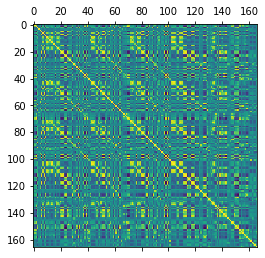

In [82]:
plt.matshow(features_df.corr())
plt.show()

Text(0, 0.5, 'Feature Number (167 = class)')

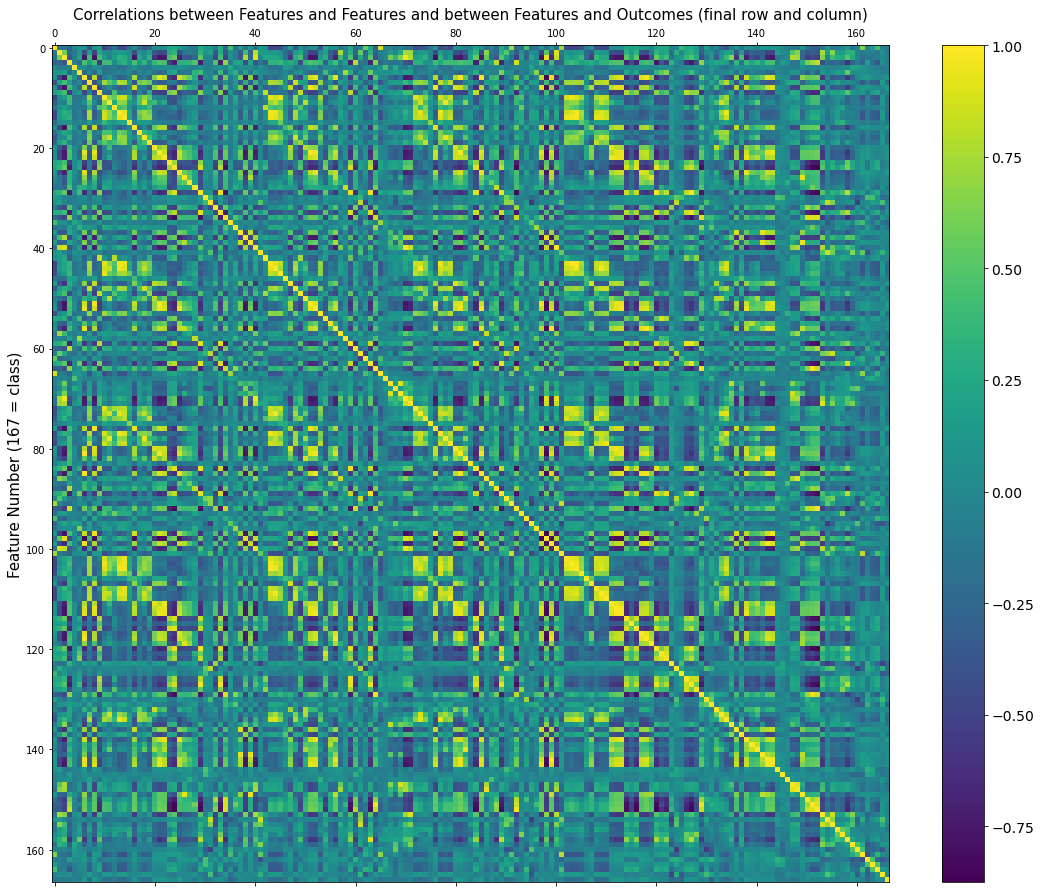

In [83]:
f = plt.figure(figsize=(19, 15))
plt.matshow(features_and_outcome_df.corr(), fignum=f.number)
# plt.xticks(range(features_df.select_dtypes(['number']).shape[1]), features_df.select_dtypes(['number']).columns, fontsize=5, rotation=45)
# plt.yticks(range(features_df.select_dtypes(['number']).shape[1]), features_df.select_dtypes(['number']).columns, fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlations between Features and Features and between Features and Outcomes (final row and column)', fontsize=15, y = 1.025);
plt.ylabel('Feature Number (167 = class)', size = 15)


Another way we might approach speeding up convergence, regardless of the type of gradient descent we use, is limiting the numbers of features on which we train the model. Thus, it is interesting to see how much room there might be for feature consolidation, particularly via principal component analysis.

To start, we can look at a correlation matrix of our 165 features and see that there seem to be a good number that d

In [84]:
c = features_df.corr()

c_abs = features_df.corr().abs()

s = c.unstack()
s_abs = c_abs.unstack()
so = s.sort_values(kind="quicksort")
so_abs = s_abs.sort_values(kind="quicksort")

print(so)
print(so_abs)

f153  f25    -0.875032
f25   f153   -0.875032
f117  f153   -0.866934
f153  f117   -0.866934
f121  f153   -0.866663
                ...   
f108  f108    1.000000
f107  f107    1.000000
f106  f106    1.000000
f104  f104    1.000000
f166  f166    1.000000
Length: 27556, dtype: float64
f61   f126    0.000004
f126  f61     0.000004
f99   f155    0.000005
f155  f99     0.000005
f79   f137    0.000029
                ...   
f108  f108    1.000000
f107  f107    1.000000
f106  f106    1.000000
f104  f104    1.000000
f166  f166    1.000000
Length: 27556, dtype: float64


In [85]:
filter = so < 1.0
filter_abs = so_abs < 1.0
filter_low_corr = so_abs < 0.001

In [86]:
so = so[filter]
so_abs = so_abs[filter_abs]
so_abs_low_corr = so_abs[filter_low_corr]

Text(0.5, 0.9955, 'Distribution of Feature-Feature Correlations')

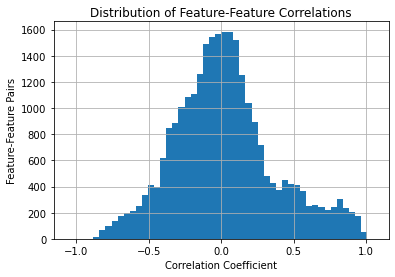

In [87]:
so.hist(bins = 50, range = (-1.05, 1.05))
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature-Feature Pairs")
plt.title("Distribution of Feature-Feature Correlations", y = 0.9955)

In [88]:
sum(so_abs > 0.8) 

1026

In [89]:
c_outcome = features_and_outcome_df.corr()

c_abs = features_and_outcome_df.corr().abs()

s = c_outcome.unstack()
s_abs = c_abs.unstack()
so = s.sort_values(kind="quicksort")
so_abs = s_abs.sort_values(kind="quicksort")

print(so)
print(so_abs)

f153   f25     -0.875032
f25    f153    -0.875032
f153   f117    -0.866934
f117   f153    -0.866934
f121   f153    -0.866663
                  ...   
f109   f109     1.000000
f108   f108     1.000000
f107   f107     1.000000
f105   f105     1.000000
class  class    1.000000
Length: 27889, dtype: float64
f61    f126     0.000004
f126   f61      0.000004
f99    f155     0.000005
f155   f99      0.000005
f137   f79      0.000029
                  ...   
f109   f109     1.000000
f108   f108     1.000000
f107   f107     1.000000
f105   f105     1.000000
class  class    1.000000
Length: 27889, dtype: float64


In [90]:
filter = so < 1.0
filter_abs = so_abs < 1.0
filter_low_corr = so_abs < 0.001

In [91]:
so = so[filter]
so_abs = so_abs[filter_abs]
so_abs_low_corr = so_abs[filter_low_corr]

In [92]:
outcome_correlations = c_outcome.iloc[:,166]

In [93]:
filter = outcome_correlations < 1.0

In [94]:
outcome_correlations = outcome_correlations[filter]

In [95]:
outcome_correlations

f1     -0.120883
f2     -0.099896
f3     -0.089760
f4     -0.098592
f5     -0.045040
          ...   
f162   -0.032974
f163   -0.217481
f164   -0.077266
f165    0.049457
f166    0.069114
Name: class, Length: 166, dtype: float64

Text(0.5, 0.9955, 'Distribution of Feature-Outcome Correlations')

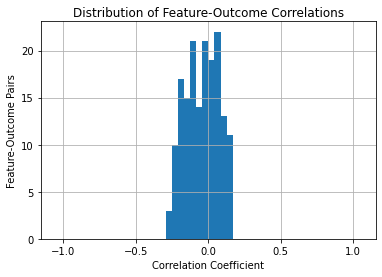

In [96]:
outcome_correlations.hist(bins = 50, range = (-1.05, 1.05))
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature-Outcome Pairs")
plt.title("Distribution of Feature-Outcome Correlations", y = 0.9955)

In [97]:
so_abs_low_corr

f61   f126    0.000004
f126  f61     0.000004
f99   f155    0.000005
f155  f99     0.000005
f137  f79     0.000029
                ...   
f3    f76     0.000948
f133  f5      0.000948
f5    f133    0.000948
f119  f42     0.000958
f42   f119    0.000958
Length: 70, dtype: float64

In [98]:
features_scaled = StandardScaler().fit_transform(features_df)

/Users/nathanieldavis/opt/miniconda3/envs/spr_2022s_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/nathanieldavis/opt/miniconda3/envs/spr_2022s_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [99]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [100]:
principalDf

,principal component 1,principal component 2
0,1.217220,9.430927
1,-3.282384,8.142049
2,-3.404298,7.778997
3,-3.286574,8.170463
4,-3.284805,8.172113
...,...,...
6593,9.490173,-0.892529
6594,9.371482,-1.684776
6595,9.375179,-1.363111
6596,9.440038,-0.633801


In [101]:
target_df = musk_df[['class']].reset_index(drop=True)

In [102]:
finalDf = pd.concat([principalDf, target_df], axis = 1, ignore_index = True)

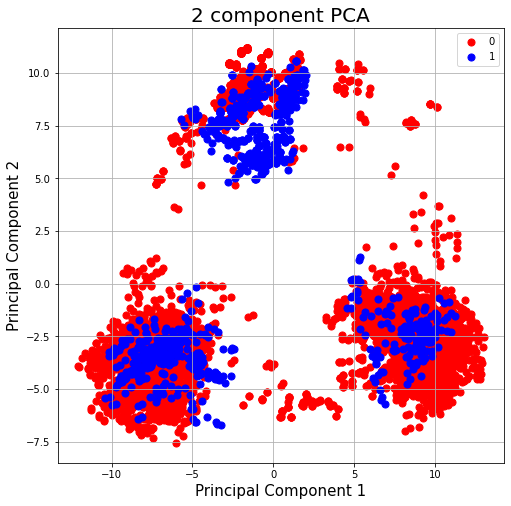

In [103]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[2] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [104]:
sum(pca.explained_variance_ratio_)

0.47099919113200595

In [105]:
variance_retained = 0
num_components = 1
pca_variance_arr = np.empty([74,2])

while variance_retained <= 0.99:
    pca = PCA(n_components=num_components)
    principalComponents = pca.fit_transform(features_scaled)
    principalDf = pd.DataFrame(data = principalComponents)
    finalDf = pd.concat([principalDf, target_df], axis = 1, ignore_index = True)
    variance_retained = sum(pca.explained_variance_ratio_)
    pca_variance_arr[num_components-1] = [num_components, variance_retained]
    print("Num components: ", num_components, " Variance retained: ", variance_retained)
    num_components += 1
    

Num components:  1  Variance retained:  0.2927082501742186
Num components:  2  Variance retained:  0.4709991911320062
Num components:  3  Variance retained:  0.520143444495225
Num components:  4  Variance retained:  0.5636557455212858
Num components:  5  Variance retained:  0.5981113514671605
Num components:  6  Variance retained:  0.6297578222878122
Num components:  7  Variance retained:  0.6590193525820081
Num components:  8  Variance retained:  0.6858945839920465
Num components:  9  Variance retained:  0.710144120421491
Num components:  10  Variance retained:  0.7336116590312054
Num components:  11  Variance retained:  0.7524188646669024
Num components:  12  Variance retained:  0.7703490382977539
Num components:  13  Variance retained:  0.7860233545070237
Num components:  14  Variance retained:  0.8005473186051912
Num components:  15  Variance retained:  0.8133880438589338
Num components:  16  Variance retained:  0.8259764235069085
Num components:  17  Variance retained:  0.83712306

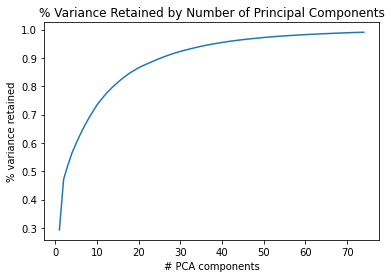

In [106]:
plt.title("% Variance Retained by Number of Principal Components") 
plt.xlabel("# PCA components") 
plt.ylabel("% variance retained") 
plt.plot(pca_variance_arr[:,0], pca_variance_arr[:,1]) 
plt.show()

In [170]:
principalDf

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1.217220,9.430927,-2.062257,-1.184650,0.757177,-0.638690,2.620163,0.358567,1.163274,0.686518,...,-0.037239,0.500030,-0.271177,-0.114100,-0.079793,0.316123,-0.100770,-0.024996,0.218072,0.170996
1,-3.282384,8.142049,-1.017105,1.234693,1.467631,-2.379757,0.394222,-0.438175,-2.677367,-0.928166,...,0.082077,0.345270,-0.416782,-0.308110,-0.053260,-0.065957,-0.055531,-0.070549,0.343401,-0.202849
2,-3.404298,7.778997,1.738739,0.958769,0.261527,-1.135047,0.039336,-0.401260,-3.004679,-1.281685,...,-0.339814,0.004634,-0.149490,0.376657,0.028100,-0.081186,-0.173472,-0.283313,0.061399,0.037316
3,-3.286574,8.170463,-0.993372,1.204385,1.458170,-2.351269,0.419175,-0.435484,-2.670036,-0.912308,...,0.071249,0.342224,-0.434478,-0.312090,-0.058902,-0.058138,-0.065875,-0.074391,0.349594,-0.210563
4,-3.284805,8.172113,-0.991081,1.203382,1.453172,-2.350218,0.422904,-0.431420,-2.669470,-0.907880,...,0.069766,0.343959,-0.435417,-0.310986,-0.054861,-0.060160,-0.063404,-0.073592,0.348569,-0.209514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,9.490173,-0.892529,-1.959918,3.684263,1.166645,0.461042,-2.115217,-1.641684,-1.532461,1.538333,...,-0.509670,-0.041737,0.315612,0.520226,0.453067,-0.159762,0.576911,-0.086462,0.247911,0.206099
6594,9.371482,-1.684776,4.103831,2.660009,-0.313284,-0.769638,-1.768295,-0.767951,-1.888742,0.083937,...,-0.431879,0.243020,0.293140,0.472944,0.024522,-0.169804,0.448237,-0.200105,0.130649,-0.019436
6595,9.375179,-1.363111,3.824673,3.041511,-0.945728,-0.452409,-1.094450,0.012677,-1.435247,-1.028834,...,0.690676,0.131244,-0.903191,-0.675633,0.096449,-0.125014,0.060243,-0.271108,0.325585,-0.730980
6596,9.440038,-0.633801,-2.260419,4.050299,0.514454,0.806387,-1.618333,-0.971484,-1.243114,0.369267,...,0.546251,-0.206184,-0.748100,-0.474353,0.405279,-0.181769,0.456018,-0.370428,0.492815,-0.637641


In [171]:
target_df = musk_df[['class']].reset_index(drop=True)

In [172]:
finalDf = pd.concat([principalDf, target_df], axis = 1, ignore_index = True)

In [173]:
pca = PCA(n_components=26)
principalComponents = pca.fit_transform(features_scaled)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, target_df], axis = 1, ignore_index = True)

In [174]:
principalDf.corr()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.000000e+00,1.057115e-16,4.218469e-16,-6.662385e-17,4.135272e-16,-6.368810e-16,1.079505e-17,-3.019001e-16,2.195319e-16,5.175883e-18,...,-2.939064e-17,-1.202313e-16,-7.874531e-18,-5.817676e-17,2.420881e-17,-1.419964e-16,-1.690712e-16,4.665591e-17,-8.798119e-17,1.959431e-17
1,1.057115e-16,1.000000e+00,1.596456e-16,-2.984756e-16,-1.488781e-16,3.101806e-16,1.031544e-16,-4.939358e-16,5.179795e-17,4.918756e-17,...,1.391422e-16,2.608015e-16,-3.194003e-16,-7.919527e-17,-8.222975e-18,1.149253e-16,-3.573230e-16,-9.409949e-17,1.347756e-16,-6.667865e-17
2,4.218469e-16,1.596456e-16,1.000000e+00,4.245182e-16,2.236708e-16,2.647452e-16,1.614514e-17,-2.344700e-16,1.429747e-16,-1.271538e-16,...,1.075036e-16,1.262606e-17,7.510608e-17,1.826476e-17,-2.842284e-16,3.434143e-16,-5.026674e-17,-9.789949e-17,1.531356e-17,-2.965310e-16
3,-6.662385e-17,-2.984756e-16,4.245182e-16,1.000000e+00,-3.895861e-16,1.392910e-16,-1.750366e-16,2.066878e-16,-2.284247e-17,-4.396565e-17,...,1.114627e-17,2.743809e-16,2.112098e-18,-5.126438e-17,7.807035e-17,-5.278457e-17,2.519624e-17,5.909068e-17,-1.262458e-16,-7.729023e-17
4,4.135272e-16,-1.488781e-16,2.236708e-16,-3.895861e-16,1.000000e+00,5.886045e-16,9.617931e-17,-5.394467e-16,8.064182e-17,4.515084e-17,...,2.494300e-17,-1.488656e-17,2.217960e-17,-9.624186e-18,-6.678036e-17,-1.883751e-17,-1.155730e-16,1.944320e-17,1.300717e-16,-1.463756e-17
5,-6.368810e-16,3.101806e-16,2.647452e-16,1.392910e-16,5.886045e-16,1.000000e+00,-4.589894e-16,3.138620e-16,7.961489e-17,3.870090e-16,...,-2.729141e-16,-4.712416e-17,-3.267681e-17,-2.842526e-16,-5.125457e-17,-1.459515e-16,-7.935870e-17,-4.268372e-17,-1.723639e-17,-7.402472e-18
6,1.079505e-17,1.031544e-16,1.614514e-17,-1.750366e-16,9.617931e-17,-4.589894e-16,1.000000e+00,-1.065076e-15,5.046443e-16,5.187707e-16,...,-7.474540e-17,2.702520e-16,1.254522e-16,3.343711e-17,7.295867e-17,7.671840e-17,-2.533048e-16,-9.369795e-17,9.011303e-17,9.715392e-17
7,-3.019001e-16,-4.939358e-16,-2.344700e-16,2.066878e-16,-5.394467e-16,3.138620e-16,-1.065076e-15,1.000000e+00,-1.685145e-16,-6.339203e-16,...,8.104408e-18,2.353994e-17,-2.452644e-18,2.339651e-16,-1.789675e-16,-3.381162e-17,2.330527e-17,9.023187e-17,1.013448e-16,1.613809e-18
8,2.195319e-16,5.179795e-17,1.429747e-16,-2.284247e-17,8.064182e-17,7.961489e-17,5.046443e-16,-1.685145e-16,1.000000e+00,2.494180e-16,...,-1.180503e-16,-6.169908e-17,-1.611837e-16,-4.998473e-17,6.109931e-17,1.385615e-16,-1.688536e-16,1.355154e-16,-1.938243e-16,7.447698e-18
9,5.175883e-18,4.918756e-17,-1.271538e-16,-4.396565e-17,4.515084e-17,3.870090e-16,5.187707e-16,-6.339203e-16,2.494180e-16,1.000000e+00,...,-1.169744e-16,6.388495e-18,2.191193e-16,9.108770e-17,-1.759152e-16,5.822666e-17,-1.414422e-16,-1.460202e-16,-2.098607e-17,-3.376303e-18


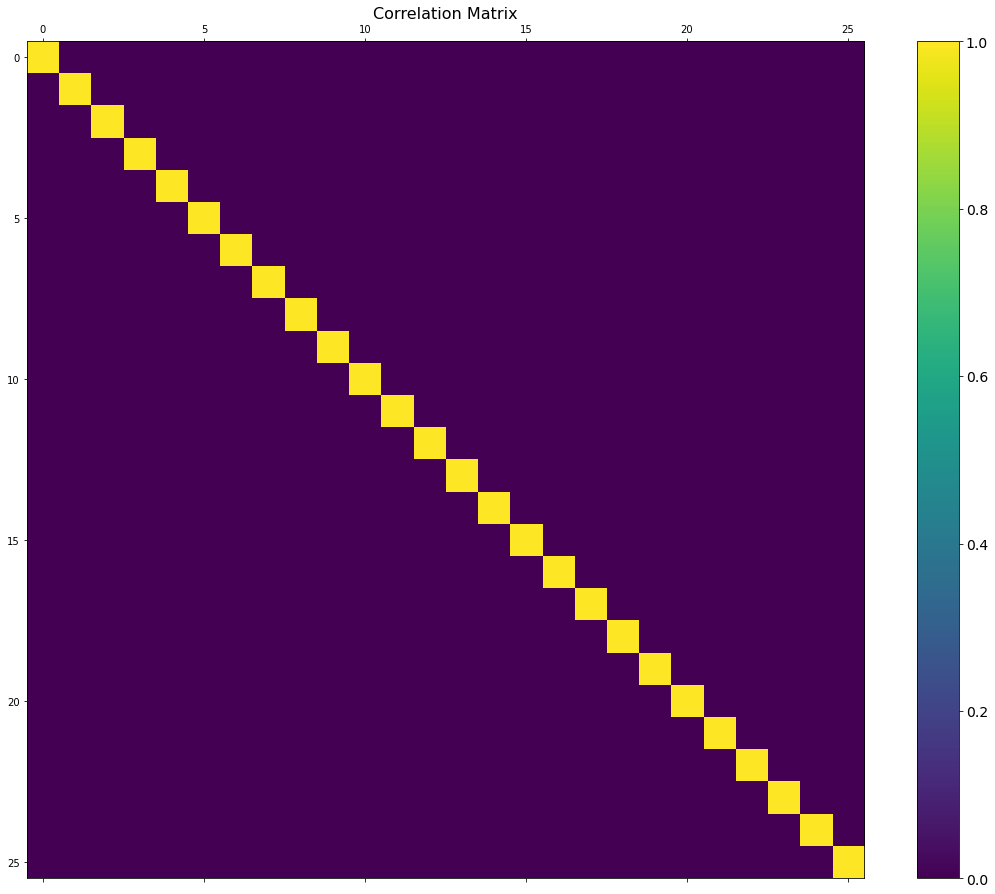

In [175]:
f = plt.figure(figsize=(19, 15))
plt.matshow(principalDf.corr(), fignum=f.number)
# plt.xticks(range(features_df.select_dtypes(['number']).shape[1]), features_df.select_dtypes(['number']).columns, fontsize=5, rotation=45)
# plt.yticks(range(features_df.select_dtypes(['number']).shape[1]), features_df.select_dtypes(['number']).columns, fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [176]:
outcome_df = musk_df.iloc[:,-1:]

In [177]:
outcome_df

,class
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6593,0.0
6594,0.0
6595,0.0
6596,0.0


In [178]:
{'center', 'top', 'bottom', 'baseline', 'center_baseline'}

{'baseline', 'bottom', 'center', 'center_baseline', 'top'}

In [179]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', va = 'bottom')

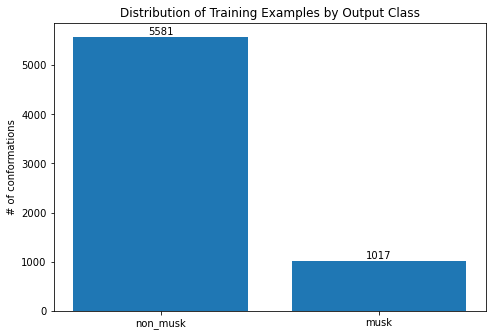

In [181]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mol_types = ['non_musk', 'musk']
molecules = outcome_df

ax.bar(mol_types, [6598-1017,1017])
ax.set_ylabel('# of conformations')
ax.set_title('Distribution of Training Examples by Output Class')
addlabels(mol_types, [6598-1017,1017])
plt.show()

Another aspect of the data set that could have an effect on learning via gradient descent is the imbalance of classes. While 63 of the molecules tested were judged to be non-musks and 39 to be musks, once factoring in the number of conformations for each molecule, the data set became much more imbalanced, with 5,581 non-musks and 1,017 musks. Thus, with each iteration of gradient descent, we would like to test using a higher error weight for misclassifications of musks and a lower one for misclassification of non-musks. We hypothesize that using these differential weights will speed up convergence.